# Exercise 6: Decision Making II
### Lukas Dippold and Evert de Man

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1: Chapman-Kolmogorov

#### (1)

In [2]:
#init
dt = 1
dx = 1
N = 2*50+1
M = 1000/dt

evo = np.zeros([N,int(M)])

#particle in the center bin
evo[int(N/2),0] = 1.

#### (2)

In [3]:
mu = 0.1
sigma = 1.0

def trans(x,xd,dt=1):
    fac = 1/np.sqrt(2*np.pi*np.power(sigma,2)*dt)
    ex = np.exp(-(np.power(x-xd-mu*dt,2))/(2*np.power(sigma,2)*dt))
    return fac*ex

In [4]:
# NxN transition matrix
transition = np.zeros([N,N])

# probability of transition from state xd to a state x
for x in range(N):
    for xd in range(N):
        transition[x,xd] = trans(x,xd)

#### (3)

In [5]:
for t in range(evo.shape[1]-1):
    evo[:,t+1] = np.dot(transition, evo[:,t])

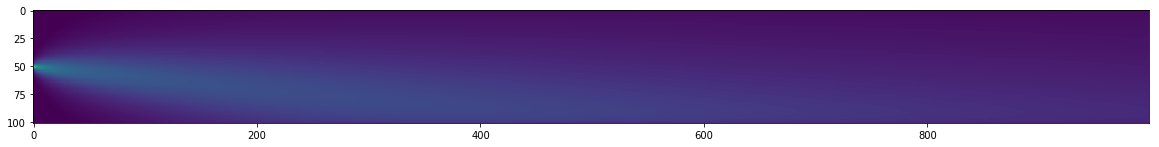

In [25]:
# eta is that we dont log negative values
eta = 1e-16

plt.figure(figsize=(20,50))
#leaving out the first time point (p[50]=1 rest 0)  to avoid divide by zero
plt.imshow(-1/(np.log(evo[:,1::] + eta)))
plt.show()

#### (4)